In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [24]:
from sklearn import datasets
iris=datasets.load_iris()
data=pd.DataFrame(iris.data,columns=iris.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
data.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)


KeyError: "['sepal length (cm)', 'sepal width (cm)'] not found in axis"

In [29]:
data.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


C:\Users\pvalb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


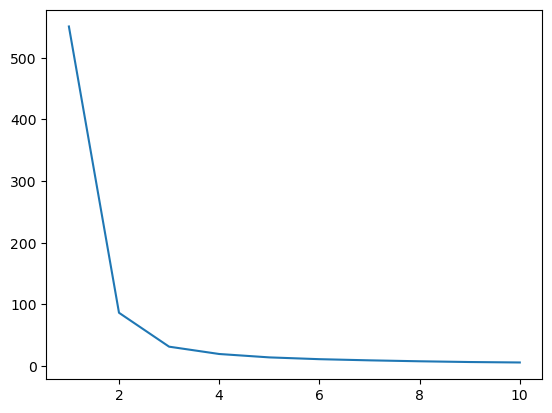

In [31]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(data)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)

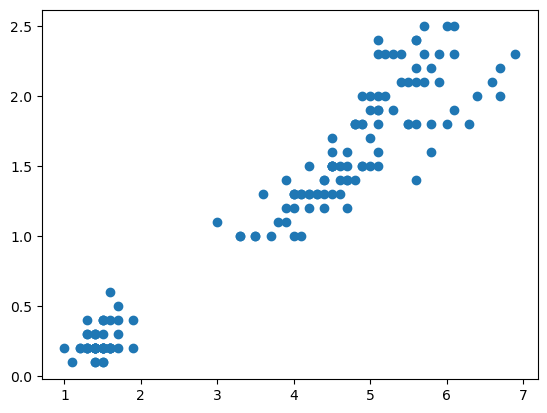

In [36]:
km=KMeans(n_clusters=3)
pred=km.fit_predict(data)
plt.scatter(data['petal length (cm)'],data['petal width (cm)'])

In [38]:
a=km.cluster_centers_
a

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

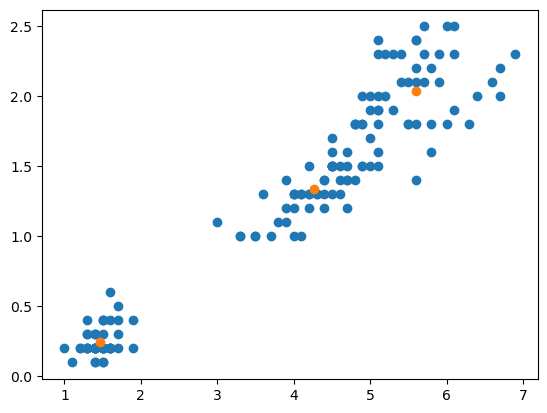

In [40]:

plt.scatter(data['petal length (cm)'],data['petal width (cm)'])
plt.scatter(a[:,0],a[:,1])

In [41]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
data['c']=pred
data

,petal length (cm),petal width (cm),c
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


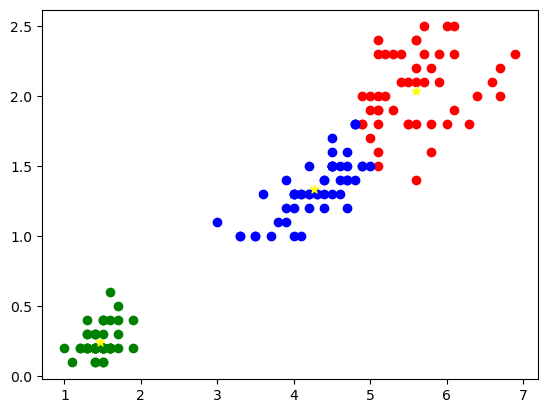

In [44]:
c1=data[data.c==0]
c2=data[data.c==1]
c3=data[data.c==2]
plt.scatter(c1['petal length (cm)'],c1['petal width (cm)'],color='red')
plt.scatter(c2['petal length (cm)'],c2['petal width (cm)'],color='green')
plt.scatter(c3['petal length (cm)'],c3['petal width (cm)'],color='blue')
plt.scatter(a[:,0],a[:,1],marker='*',color='yellow')